# Install Necessary Libraries

In [ ]:
%pip install nltk
%pip install emoji
%pip install pandas
%pip install wordcloud
%pip install torch



In [ ]:
!pip install nltk
!pip install emoji
!pip install pandas
!pip install wordcloud
!pip install torch

# Preprocessing Text Data for Sentiment Analysis

In [ ]:
# Import necessary libraries for preprocessing
import pandas as pd
import re
import nltk
import os
import string

# Ensure NLTK stopwords are downloaded
try:
    nltk_data_dir = os.path.join(os.path.expanduser('~'), 'nltk_data')
    os.makedirs(nltk_data_dir, exist_ok=True)
    nltk.download('stopwords', download_dir=nltk_data_dir)
    nltk.data.path.append(nltk_data_dir)
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")

from nltk.corpus import stopwords

def preprocess_text(text):
    # Ensure text is a string and convert to lowercase
    text = str(text).lower()
    
    # Remove URLs starting with http or https
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove image file extensions (.jpg, .jpeg, .png, .gif, .bmp, .tiff)
    text = re.sub(r'\.(jpg|jpeg|png|gif|bmp|tiff)', '', text)
    
    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters (which includes emojis)
    
    # Remove hashtags
    text = re.sub(r'#\S+', '', text)
    
    # Tokenization: split on whitespace
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    
    # Filter tokens: remove stopwords and keep only alphabetic words
    cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    # Join the cleaned tokens back into a string
    return ' '.join(cleaned_tokens)

# Main processing script
def process_hogwarts_posts():
    try:
        # Load the CSV file
        df = pd.read_csv("hogwarts_legacy_gaming_alltime_posts.csv")
        
        # Apply preprocessing to the 'Title' column
        df['cleaned_title'] = df['Title'].apply(preprocess_text)
        
        # Save only the cleaned data (just the 'cleaned_title' column) to a new CSV
        df[['cleaned_title']].to_csv("hogwarts_legacy_cleaned_posts.csv", index=False)
        
        # Print some statistics (for debugging)
        print(f"Total posts processed: {len(df)}")
        print("\nFirst 5 cleaned titles:")
        print(df['cleaned_title'].head())
        
        return df
    
    except Exception as e:
        print(f"Error processing CSV: {e}")
        return None

# Run the processing
if __name__ == "__main__":
    processed_df = process_hogwarts_posts()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thega\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total posts processed: 1000

First 5 cleaned titles:
0                      please let travel
1                       two types people
2    every five steps dont miss anything
3          got little carried away first
4          found merlin trial walk today
Name: cleaned_title, dtype: object


# Sentiment Analysis Using VADER

Sentiment analysis complete. Results saved to 'hogwarts_vader_sentiments.csv'.
Sentiment
Neutral     535
Positive    302
Negative    163
Name: count, dtype: int64


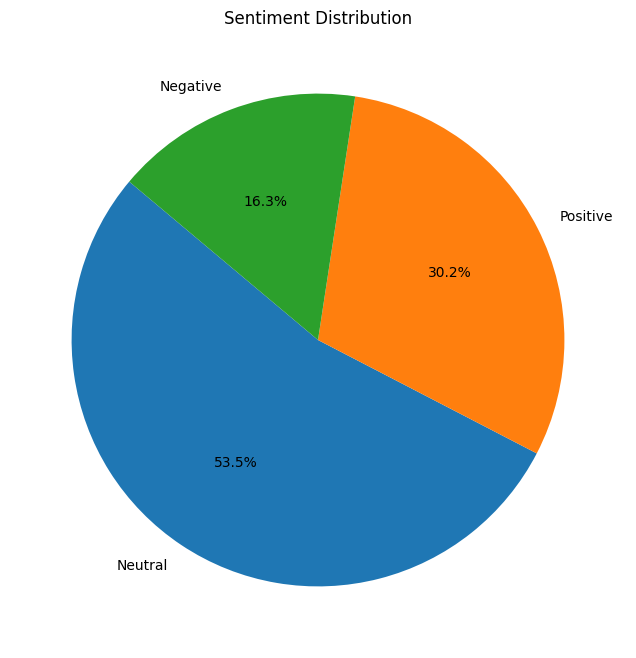

Top words for Positive sentiment:
[('like', 40), ('game', 32), ('hogwarts', 29), ('love', 22), ('legacy', 17), ('one', 17), ('playing', 15), ('im', 14), ('time', 12), ('favorite', 11), ('great', 11), ('character', 11), ('best', 10), ('much', 10), ('pretty', 10), ('first', 10), ('think', 9), ('looks', 9), ('anyone', 9), ('good', 8)]



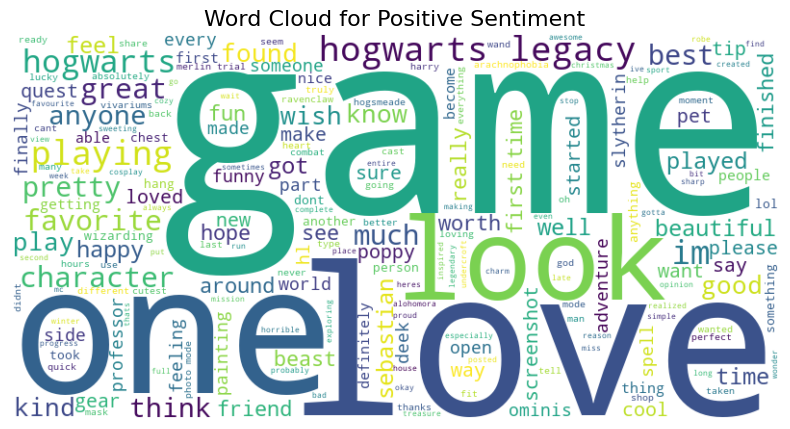

Top words for Negative sentiment:
[('else', 10), ('bad', 9), ('im', 8), ('game', 8), ('hard', 7), ('anyone', 7), ('hogwarts', 6), ('hate', 6), ('like', 6), ('one', 6), ('accidentally', 6), ('feel', 5), ('got', 5), ('poor', 4), ('dont', 4), ('thought', 4), ('legacy', 4), ('found', 4), ('kill', 4), ('quest', 4)]



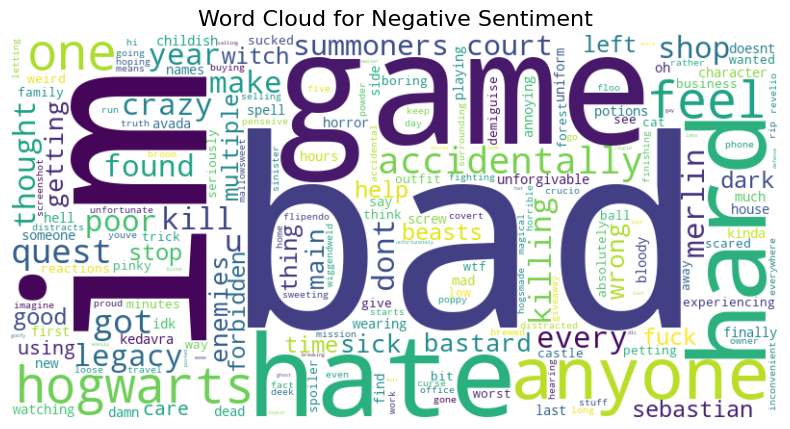

Top words for Neutral sentiment:
[('hogwarts', 42), ('game', 27), ('merlin', 25), ('anyone', 23), ('trial', 20), ('else', 17), ('one', 17), ('legacy', 17), ('got', 16), ('know', 16), ('get', 16), ('found', 15), ('think', 15), ('finally', 15), ('time', 14), ('first', 13), ('mine', 12), ('cant', 11), ('room', 10), ('demiguise', 10)]



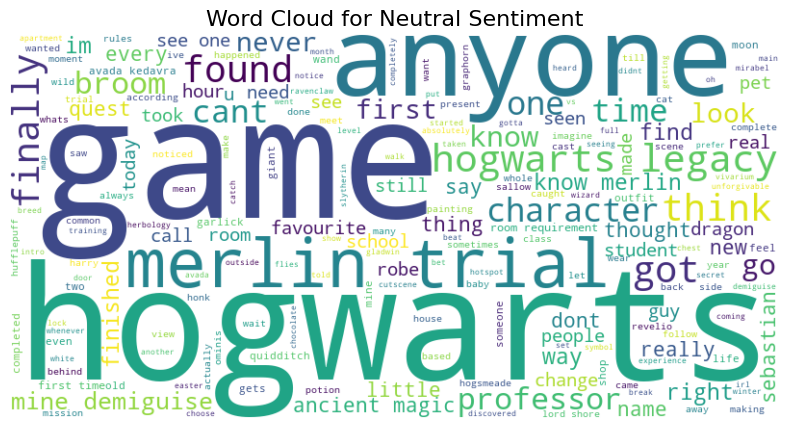

In [ ]:
# Import necessary libraries for Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load the cleaned data
df = pd.read_csv("hogwarts_legacy_cleaned_posts.csv")

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment_vader(text):
    # Ensure the input is a string
    text = str(text) if not pd.isnull(text) else ""
    # Get sentiment scores from VADER
    scores = analyzer.polarity_scores(text)
    # Classify sentiment based on the compound score
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply VADER sentiment classification to the cleaned titles
df['Sentiment'] = df['cleaned_title'].apply(classify_sentiment_vader)

# Save results to a new CSV file
output_file = "hogwarts_vader_sentiments.csv"
df.to_csv(output_file, index=False)

# Print a summary of the results
print(f"Sentiment analysis complete. Results saved to '{output_file}'.")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Plot the pie chart for sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Sentiment Distribution")
plt.show()

# Function to get frequent words for a specific sentiment
def get_frequent_words(sentiment, n=20):
    # Filter the dataframe by sentiment
    filtered_text = df[df['Sentiment'] == sentiment]['cleaned_title'].dropna()
    # Combine all cleaned titles into a single string
    all_words = ' '.join(filtered_text).split()
    # Count word frequencies
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Function to generate a word cloud for a specific sentiment
def generate_wordcloud(sentiment, title):
    filtered_text = df[df['Sentiment'] == sentiment]['cleaned_title'].dropna()
    text = ' '.join(filtered_text)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Analyze frequent words and generate word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    # Get the most frequent words
    frequent_words = get_frequent_words(sentiment)
    print(f"Top words for {sentiment} sentiment:")
    print(frequent_words)
    print()
    
    # Generate and display the word cloud
    generate_wordcloud(sentiment, f"Word Cloud for {sentiment} Sentiment")


# Sentiment Analysis Using BERT

c:\Python311\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\andre\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Sentiment analysis complete. Results saved to 'hogwarts_bert_sentiments.csv'.
Sentiment
Neutral     702
Positive    160
Negative    138
Name: count, dtype: int64


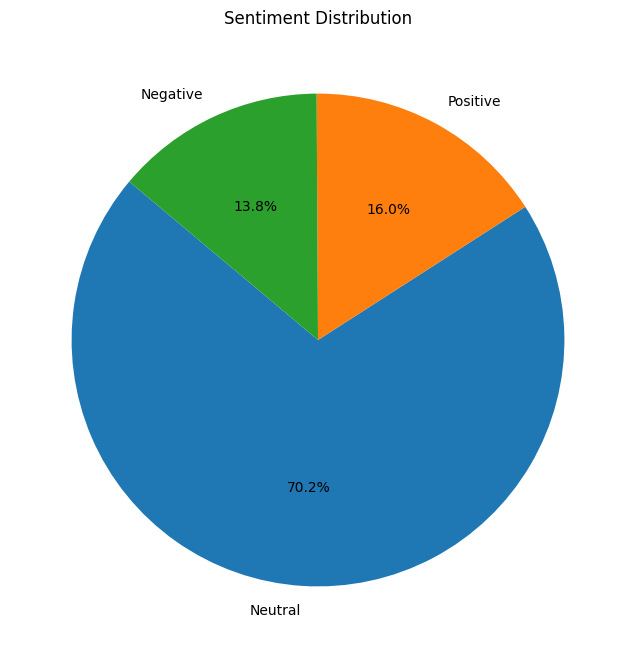

Top words for Positive sentiment:
[('love', 21), ('game', 20), ('hogwarts', 16), ('one', 11), ('best', 9), ('finally', 9), ('favorite', 8), ('much', 8), ('legacy', 8), ('great', 8), ('good', 7), ('beautiful', 7), ('happy', 7), ('fun', 6), ('cool', 6), ('character', 6), ('pretty', 6), ('like', 6), ('favourite', 5), ('looks', 5)]



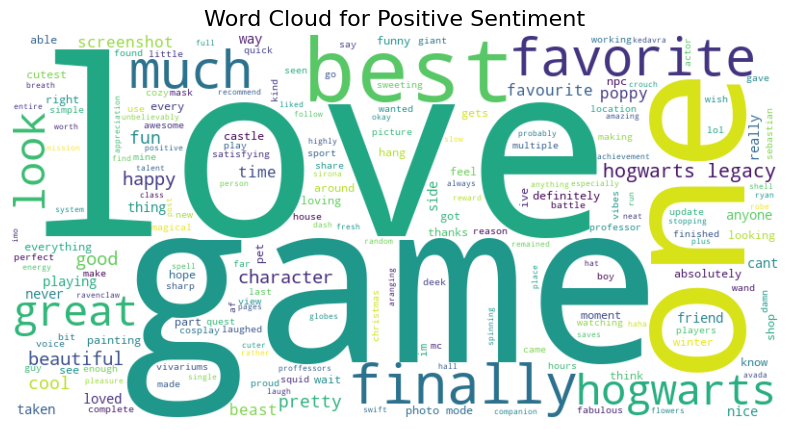

Top words for Negative sentiment:
[('bad', 9), ('got', 7), ('like', 7), ('im', 7), ('cant', 6), ('game', 6), ('one', 6), ('hate', 6), ('first', 5), ('feel', 5), ('else', 5), ('quest', 5), ('poor', 4), ('hogwarts', 4), ('ever', 4), ('getting', 4), ('oh', 4), ('killing', 4), ('anyone', 4), ('dont', 4)]



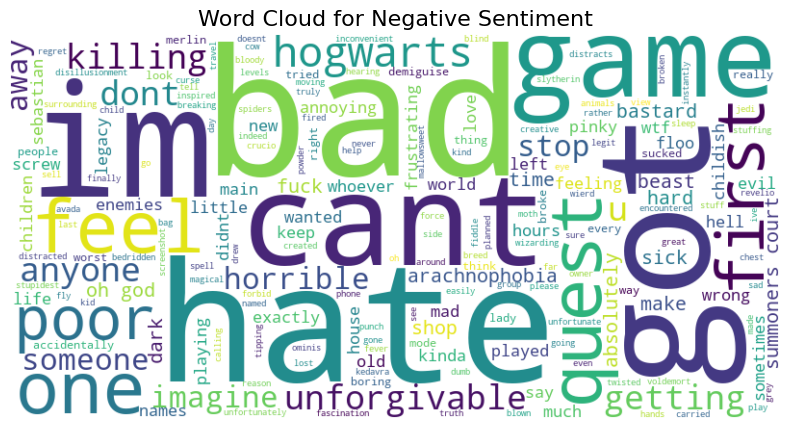

Top words for Neutral sentiment:
[('hogwarts', 57), ('game', 41), ('like', 34), ('anyone', 31), ('merlin', 30), ('legacy', 28), ('found', 25), ('else', 25), ('one', 23), ('time', 22), ('trial', 21), ('know', 21), ('think', 20), ('im', 19), ('get', 19), ('first', 19), ('got', 18), ('character', 14), ('see', 14), ('room', 12)]



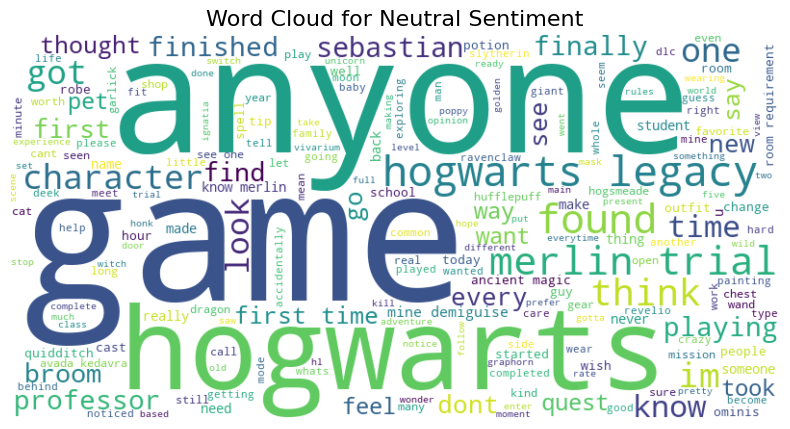

In [6]:
# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load the cleaned data
df = pd.read_csv("hogwarts_legacy_cleaned_posts.csv")

# Load the pre-trained model for 3-class sentiment analysis
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Initialize sentiment analysis pipeline
sentiment_pipeline = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Function to classify sentiment using the 3-class BERT model
def classify_sentiment_bert(text):
    # Ensure the input is a string
    text = str(text) if not pd.isnull(text) else ""
    # Get sentiment predictions
    result = sentiment_pipeline(text, truncation=True, max_length=512)
    label = result[0]['label']
    # Convert model labels to desired format
    if label == "LABEL_0":
        return "Negative"
    elif label == "LABEL_1":
        return "Neutral"
    elif label == "LABEL_2":
        return "Positive"

# Apply BERT sentiment classification to the cleaned titles
df['Sentiment'] = df['cleaned_title'].apply(classify_sentiment_bert)

# Save results to a new CSV file
output_file = "hogwarts_bert_sentiments.csv"
df.to_csv(output_file, index=False)

# Print a summary of the results
print(f"Sentiment analysis complete. Results saved to '{output_file}'.")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Plot the pie chart for sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Sentiment Distribution")
plt.show()

# Function to get frequent words for a specific sentiment
def get_frequent_words(sentiment, n=20):
    # Filter the dataframe by sentiment
    filtered_text = df[df['Sentiment'] == sentiment]['cleaned_title'].dropna()
    # Combine all cleaned titles into a single string
    all_words = ' '.join(filtered_text).split()
    # Count word frequencies
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Function to generate a word cloud for a specific sentiment
def generate_wordcloud(sentiment, title):
    filtered_text = df[df['Sentiment'] == sentiment]['cleaned_title'].dropna()
    text = ' '.join(filtered_text)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Analyze frequent words and generate word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    # Get the most frequent words
    frequent_words = get_frequent_words(sentiment)
    print(f"Top words for {sentiment} sentiment:")
    print(frequent_words)
    print()
    
    # Generate and display the word cloud
    generate_wordcloud(sentiment, f"Word Cloud for {sentiment} Sentiment")


# Sentiment Analysis Classifiers
This will not be used, it's just for comparison

Columns in the dataset: ['cleaned_title']
Missing values in 'cleaned_title': 35

Training and evaluating Naive Bayes...
Naive Bayes Accuracy: 0.3850
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

          -1       0.37      0.39      0.38        67
           0       0.45      0.42      0.43        65
           1       0.34      0.35      0.35        68

    accuracy                           0.39       200
   macro avg       0.39      0.39      0.39       200
weighted avg       0.39      0.39      0.39       200

Confusion Matrix (Naive Bayes):
 [[26 17 24]
 [16 27 22]
 [28 16 24]]

Training and evaluating Logistic Regression...
Logistic Regression Accuracy: 0.3650
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

          -1       0.38      0.54      0.45        67
           0       0.38      0.31      0.34        65
           1       0.32      0.25      0.28        68

    accuracy 

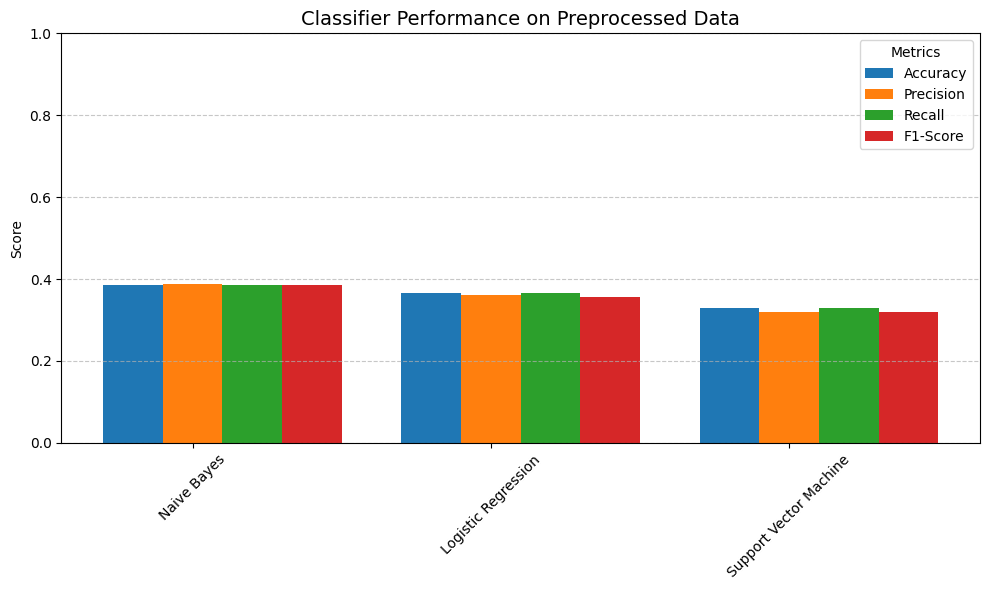

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the preprocessed data
df = pd.read_csv("hogwarts_legacy_cleaned_posts.csv")

# Verify the structure of the dataset
print("Columns in the dataset:", df.columns.tolist())

# Check for missing values
if 'cleaned_title' not in df.columns:
    raise ValueError("The dataset must include a 'cleaned_title' column with preprocessed text.")
print("Missing values in 'cleaned_title':", df['cleaned_title'].isnull().sum())

# Handle missing values by replacing NaN with an empty string
df['cleaned_title'] = df['cleaned_title'].fillna("")

# Example of assigning sentiment labels (you need to adapt this if you have your own labeling system)
# Assuming a manual sentiment mapping: e.g., 1 for Positive, -1 for Negative, 0 for Neutral
# Replace this with your actual sentiment label column if available
# Here we simulate a `Sentiment` column for demonstration purposes
import random
random.seed(42)
df['Sentiment'] = [random.choice([1, 0, -1]) for _ in range(len(df))]

# Prepare features and target
X = df['cleaned_title']  # Features (preprocessed text)
y = df['Sentiment']      # Target labels (Positive: 1, Neutral: 0, Negative: -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# --- Define Classifiers ---
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": LinearSVC(max_iter=1000)
}

# Initialize a dictionary to store evaluation metrics
metrics = {}

# Train and evaluate each classifier
for name, model in classifiers.items():
    print(f"\nTraining and evaluating {name}...")
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate the model
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Classification Report ({name}):\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix ({name}):\n", confusion_matrix(y_test, y_pred))
    
    # Store metrics for comparison
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics[name] = {
        "Accuracy": acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    }

# --- Plot Comparison of Classifiers ---
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
bar_width = 0.2
x_positions = range(len(metrics))

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metric_names):
    values = [metrics[name][metric] for name in metrics]
    ax.bar([x + i * bar_width for x in x_positions], values, bar_width, label=metric)

# Set up the plot
ax.set_title("Classifier Performance on Preprocessed Data", fontsize=14)
ax.set_xticks([x + bar_width for x in x_positions])
ax.set_xticklabels(metrics.keys(), rotation=45)
ax.set_ylabel("Score")
ax.set_ylim(0, 1)
ax.legend(title="Metrics")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
